<a href="https://colab.research.google.com/github/shubha3/CGS698c-Bayesian-Data-Analysis-and-Modelling/blob/main/Assignment-2/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arviz==0.11.0
!pip install pymc3==3.10

In [ ]:
import numpy as np
import scipy as sp
import pymc3 as pm
import arviz as az
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The experiment
involves 8 stimuli that have been categorized into two classes A and B. The categorization is based on two
stimulus attributes - height of the rectangle and position of a vertical line inside the rectangle.

Extracting the Data

In [ ]:
d={'y': [[245], [218], [255], [126], [182], [71], [102], [65]], 'd1': [[0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0]], 'd2': [[0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0]], 'nstim': 8, 'nsubj': 40, 'a': [1, 1, 1, 2, 1, 2, 2, 2], 'x': [[5, 6, 6, 2, 4, 1, 3, 1], [5, 6, 8, 0, 3, 1, 5, 2], [7, 7, 8, 6, 1, 2, 2, 3], [7, 7, 6, 3, 5, 4, 0, 1], [8, 6, 8, 7, 3, 3, 1, 0], [8, 7, 8, 3, 4, 0, 0, 0], [6, 5, 5, 3, 3, 1, 4, 1], [8, 8, 6, 4, 4, 0, 1, 0], [7, 8, 8, 4, 7, 0, 3, 0], [8, 8, 8, 7, 4, 1, 1, 0], [8, 8, 8, 3, 3, 0, 1, 0], [7, 6, 7, 4, 3, 1, 1, 0], [7, 8, 7, 1, 3, 0, 0, 3], [7, 6, 8, 2, 5, 0, 1, 0], [8, 4, 6, 5, 4, 3, 4, 2], [7, 7, 8, 5, 4, 5, 2, 0], [8, 8, 7, 3, 5, 0, 1, 0], [8, 6, 7, 6, 4, 2, 1, 1], [8, 6, 8, 1, 2, 0, 1, 0], [8, 6, 8, 4, 5, 1, 0, 0], [5, 6, 6, 3, 1, 2, 2, 1], [3, 4, 4, 5, 4, 5, 1, 2], [3, 3, 5, 3, 7, 2, 5, 5], [5, 3, 6, 2, 4, 1, 5, 1], [5, 6, 6, 1, 7, 1, 3, 3], [8, 7, 3, 4, 7, 5, 2, 0], [6, 3, 7, 3, 6, 1, 5, 6], [8, 8, 6, 3, 5, 1, 0, 0], [2, 3, 4, 2, 7, 6, 6, 4], [6, 5, 6, 1, 4, 1, 1, 1], [4, 2, 3, 3, 4, 5, 4, 6], [6, 6, 6, 2, 7, 2, 1, 1], [5, 1, 7, 0, 6, 0, 7, 3], [4, 2, 5, 0, 6, 1, 8, 4], [7, 6, 7, 6, 3, 1, 0, 3], [6, 7, 3, 4, 8, 6, 2, 3], [8, 7, 7, 3, 6, 1, 2, 1], [3, 3, 5, 3, 2, 3, 4, 3], [4, 0, 8, 0, 7, 0, 7, 1], [2, 3, 6, 5, 5, 2, 5, 3]], 'n': 8}

We will further extract the data on the following:
<ul>
<li> Height of the stimulus ($d_1$)</li>
<li> Position of the stimulus ($d_2$)</li>
</ul>

In [ ]:
d1_ar=np.array(d['d1'])
d1=pd.DataFrame(d1_ar)
#type(d1_ar)

In [ ]:
d2_ar=np.array(d['d2'])
d2=pd.DataFrame(d2_ar)

## Initializing the stimulus sequence
Note that this array ($a$) denote the actual order the stimulus is presented to a participant (Either in Group A or B, being denoted by 1 or 2 respectively)

In [ ]:
a=np.array(d['a'])
a

array([1, 1, 1, 2, 1, 2, 2, 2])

### Initialising the response y
The given array on $y$ gives the total number of times the $i^{th},\ i=1(1)40$ stimulus is categorized into group A by all the 40 participants.<br>
That is, if $y_{ij}$ denotes the number of times $i^{th}$ stimulus is catgorized by the $j^{th}$ subject as category, then the array $y$ has 8 elements in the form: $$y_i=\sum_{j=1}^{40}y_{ij}$$

In [ ]:
d['y']

[[245], [218], [255], [126], [182], [71], [102], [65]]

In [ ]:
y=np.array([])
for i in range(8):
  to_append=np.array(d['y'][i])
  y=np.append(y,to_append)
y

array([245., 218., 255., 126., 182.,  71., 102.,  65.])

In [ ]:
# We store the indexes of the stimulus which were originally in Groups A and B respectively
grp_a=np.array(np.where(a==1))
grp_b=np.array(np.where(a==2))
grp_b[0]

array([3, 5, 6, 7])

In [ ]:
# Initializing an array of indexes of stimuli
nstim=d['nstim']
type(nstim)
nstim_idx=np.arange(nstim)
nstim_idx

array([0, 1, 2, 3, 4, 5, 6, 7])



---
## (a)



Given that the two dimensions can be represented as the pair $(p_{i1},p_{i2}$. It is given that the weight given to the first dimension is $w$ where $0\leq w\leq 1$ and that to the second dimension be $1-w$.<br>
With this information we calculate the distance between two stimulus as follows:$$d_{ij}=w|p_{i1}-p_{j1}|+(1-w)|p_{i2}-p_{j2}|=w\cdot d_1+(1-w)\cdot d_2$$.<br>
We further define the following:
$$s_{ij}=e^{-c\cdot d_{ij}}$$
Clealy $0\leq s_{ij}\leq 1$.<br>
Further, the probability of the $i^{th}$ stimulus is given by:
$$r_i=\frac{b\cdot s_{iA}}{b\cdot s_{iA}+(1-b)\cdot s_{iB}}$$.<br>
$b$ is the bias parameter, chosen here as 0.5 (fixed).<br>
The observed data is Binomial in nature, distribution given by:$$y_i\sim Binomial(r_i,t)$$


---



Since $0\leq w\leq 1$ we will assume a $Uniform(0,1)$ prior distribution for this parameter.<br>
We see that $c$ is the rate parameter of an Exponentially function, thus it has to be positive. So I have considered an $Exponential(1/30)$ prior, with high rate of decrease. I have assumed that high values of $c$ would be less credible. 



---

## (b)

In [ ]:
with pm.Model() as model0:
  w=pm.Uniform('w',0,1)                             # Prior for w
  c=pm.Exponential('c',1/30)                        # Prior for c
  d_ij_A=(w*d1[grp_a[0]])+((1-w)*d2[grp_a[0]])      # Calculating d_ij for only the stimuli actually belonging to group A
  d_ij_B=(w*d1[grp_b[0]])+((1-w)*d2[grp_b[0]])      # Calculating d_ij for only the stimuli actually belonging to group B
  s_ij_A=np.exp(-c*d_ij_A)                          # Calculating s_ij for only the stimuli actually belonging to group A
  s_ij_B=np.exp(-c*d_ij_B)                          # Calculating d_ij for only the stimuli actually belonging to group A
  s_iA=s_ij_A.sum(axis=1)                           
  s_iB=s_ij_B.sum(axis=1)
  r=s_iA/(s_iA+s_iB)                                # Here b=0.5 cancels out in numerator and denominator
  y_i=pm.Binomial('y_i',n=320,p=r[nstim_idx],observed=y[nstim_idx])  # Mentioned the index to ensure the likelihood remains as required form
  t_1=pm.sample(20000,tune=1500)                    # Sampling points from the posterior distribution

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [c, w]


Sampling 2 chains for 1_500 tune and 20_000 draw iterations (3_000 + 40_000 draws total) took 34 seconds.




---

We plot the posterior distribution by sampling points from it. The following plot shows the most credible values of the model parameters $w$ and $c$ and also the 95% HDI.

/usr/local/lib/python3.7/dist-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8187e12c90>,
      dtype=object)

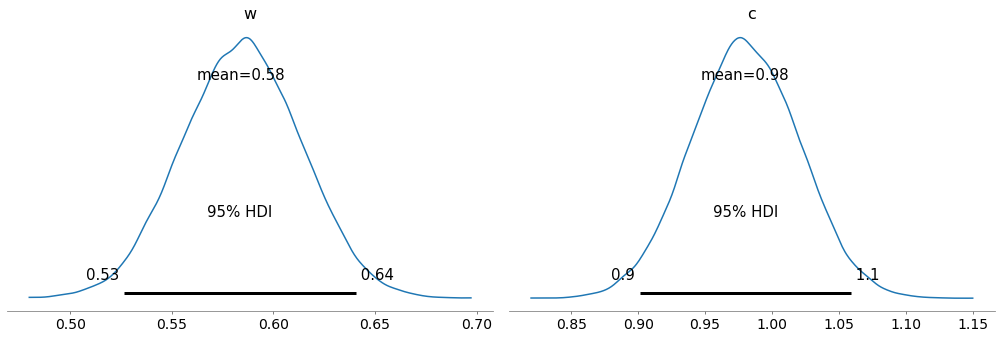

In [ ]:
az.plot_posterior(t_1,credible_interval=0.95)



---
We can clearly see that the most credible values of the model parameters $w$ and $c$ for the given data are $0.58$ and $0.98$ respectively.<br>
The 95% HDI of $w$ is $(0.53,0.64)$.<br>
The 95% HDI of $c$ is $(0.9,1.1)$. 




---
The following plot shows the MCMC chains which the sampler chain followed to obtain the trace. We can clearly see that the chains are thoroughly mixed, indicating an efficient sampling from the posterior distribution.


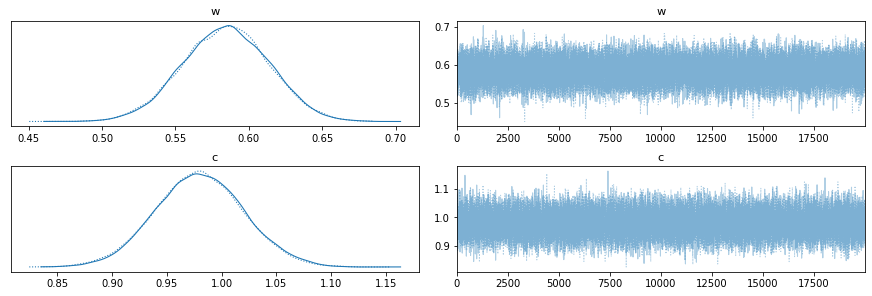

In [ ]:
with model0:
  pm.plot_trace(t_1)



---

The following is the dependency diagram of our proposed model.

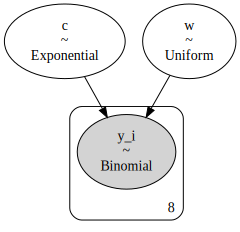

In [ ]:
pm.model_to_graphviz(model0)



---
From the joint plot of the values of model parameters sampled from the posterior distribution, we can conclude that the effect of the parameters in our model is quite independent of each other.


/usr/local/lib/python3.7/dist-packages/arviz/plots/jointplot.py:144: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba56a0ef10>,
      dtype=object)

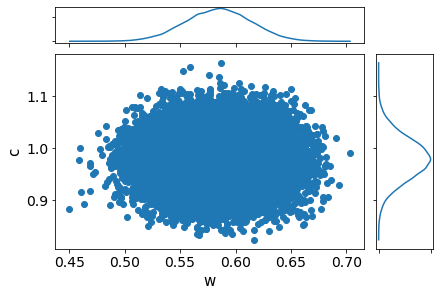

In [ ]:
az.plot_joint(t_1)



---



# (c)
Now we will look into the responses of all 40 participants and try to figure out if there are individual variations or group variations which can be modelled differently.<br>


In [ ]:
# We will first extract the data for all the 40 participants
x_ar=d['x']
x=pd.DataFrame(x_ar)

In [ ]:
# List of indexes used to identify each participant
g=np.arange(1,41)
gg=g.astype(str)
ggg=gg.tolist()



---

We look into a plot showing the number of times each participant has categorized each stimuli as group A out of 8 repeatitionos of the experiment.<br>
I have plotted the frequency of the event against the individual stimuli.

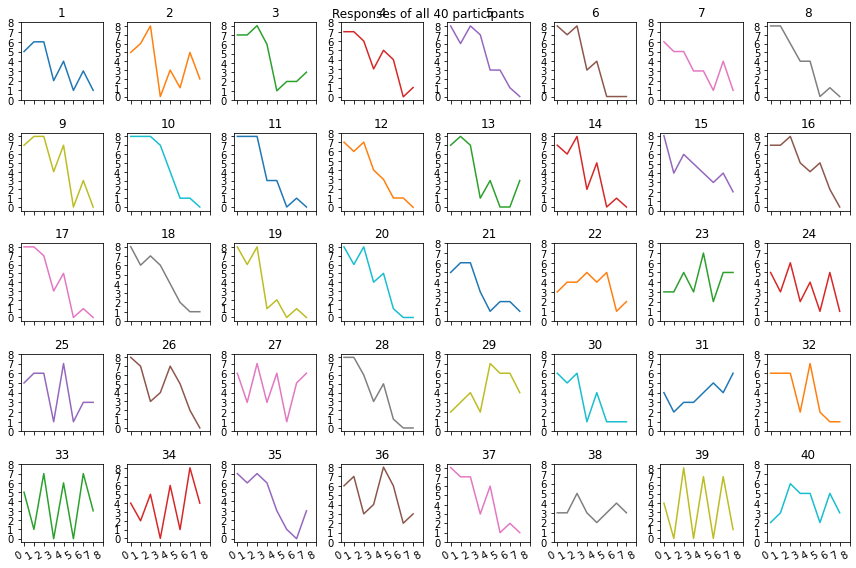

In [ ]:
fig=x.T.plot(subplots=True,layout=(5,8),figsize=(12,8),xticks=[0,1,2,3,4,5,6,7,8],yticks=[0,1,2,3,4,5,6,7,8],legend=False,title=ggg)
plt.suptitle('Responses of all 40 participants')
plt.tight_layout()



---
Based on visual inspection we can see the following:
<ul>
<li> Some participant tend to categorize fewer stimuli to group A as the number with each successive stimulus observation. For them we see a plot which indicates a <bold>gradual decrease</bold> in frequency of categorization to group A over each observation.</li>
<li> Some participants have categorized the stimuli into group A in a visibly random manner.</li>
</ul>

We see that participants indexed (1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 28, 35, 37) comply to the first point, and participants indexed (2, 3, 7, 13, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 38, 39, 40) comply to the second point.<br>
I have henceforth classified these two categories as two groups.


In [ ]:
# Dividing the participants into two groups each of size 20
id1=np.array([1,4,5,6,8,9,10,11,12,14,15,16,17,18,19,20,21,28,35,37]) # These participants show a decrease in naming a stimuli in
                                                                      # category A with number of observations
id2=np.array([2,3,7,13,22,23,24,25,26,27,29,30,31,32,33,34,36,38,39,40])  # These participants show almost random pattern in naming a stimuli in
                                                                          # category A with number of observations
x1=x.T[id1-1]
x2=x.T[id2-1]

In [ ]:
# Defining a series of two arrays according to the two newly created groups
x_model={}
x_model[0]=x1
x_model[1]=x2



---
Now defining a vector which would contain the total number of times all the participants categorized the $i^{th},\ i=1(1)8$ stimuli into group A for each of the two created subgroups.


In [ ]:
# (2,8) matrix to store the total categorization for each stimulus for the 2 proposed groups
x_m=np.zeros(shape=(2,8))

In [ ]:
for i in range(2):
  x_m[i]=x_model[i].T.sum(axis=0)
x_m

array([[148., 134., 143.,  78.,  81.,  26.,  25.,  10.],
       [ 97.,  84., 112.,  48., 101.,  45.,  77.,  55.]])

In [ ]:
y

array([245., 218., 255., 126., 182.,  71., 102.,  65.])



---
It can be noted that sum of each column of the $x_m$ matrix yield a value from the $y$ vector given in the data set.


In [ ]:
# Creating a linear vector by appending the values of both groups
x_all=x_m.flatten()
x_all

array([148., 134., 143.,  78.,  81.,  26.,  25.,  10.,  97.,  84., 112.,
        48., 101.,  45.,  77.,  55.])

In [ ]:
models=[]
traces=[]
for i in range(2):
  with pm.Model() as model:
    w_m=pm.Uniform('w_m',0,1)
    c_m=pm.Exponential('c_m',1/30)  
    #b=pm.Uniform('b',0,1)
    d_ij_A_m=(w_m*d1[grp_a[0]])+((1-w_m)*d2[grp_a[0]])
    d_ij_B_m=(w_m*d1[grp_b[0]])+((1-w_m)*d2[grp_b[0]])
    s_ij_A_m=np.exp(-c_m*d_ij_A_m)
    s_ij_B_m=np.exp(-c_m*d_ij_B_m)
    s_iA_m=s_ij_A_m.sum(axis=1)
    s_iB_m=s_ij_B_m.sum(axis=1)
    r_m=s_iA_m/(s_iA_m+s_iB_m)
    y_i_m=pm.Binomial('y_i_m',n=160,p=r_m[nstim_idx],observed=x_m[i][nstim_idx])
    trace=pm.sample(2000,tune=1500)
    models.append(model)
    traces.append(trace)

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [c_m, w_m]


Sampling 2 chains for 1_500 tune and 2_000 draw iterations (3_000 + 4_000 draws total) took 7 seconds.
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [c_m, w_m]


Sampling 2 chains for 1_500 tune and 2_000 draw iterations (3_000 + 4_000 draws total) took 6 seconds.




---


We plot the posterior distribution by sampling points from it. The following plot shows the most credible values of the model0 parameters  $w_m$  and  $c_m$  and also the 95% HDI. (Note the model0 denotes the first model)

/usr/local/lib/python3.7/dist-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d5777b4d0>,
      dtype=object)

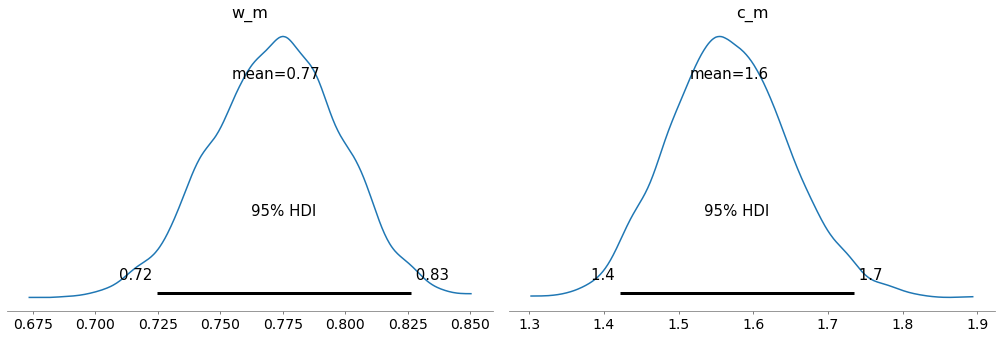

In [ ]:
az.plot_posterior(traces[0],credible_interval=0.95)



---


We see that for the first model, the most credible value of the model parameters are: 0.77 and 1.6 for $w_m$ and $c_m$ repectively.

We further obtain the traceplot, and notice that the MCMC chains are throughly mixed.

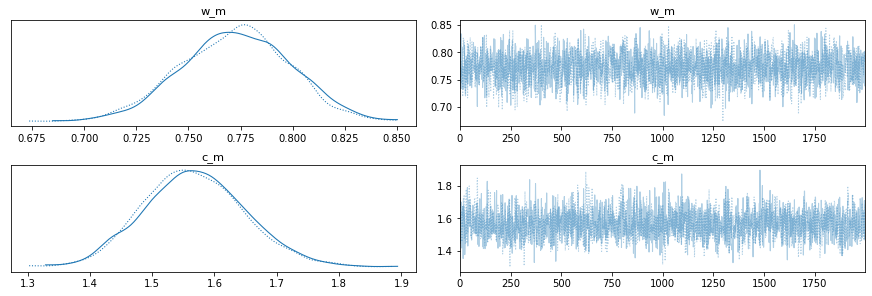

In [ ]:
with models[0]:
  pm.plot_trace(traces[0])


---


We plot the posterior distribution by sampling points from it. The following plot shows the most credible values of the model1 parameters  $w_m$  and  $c_m$  and also the 95% HDI. (Note the model0 denotes the second model)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d571f7b90>,
      dtype=object)

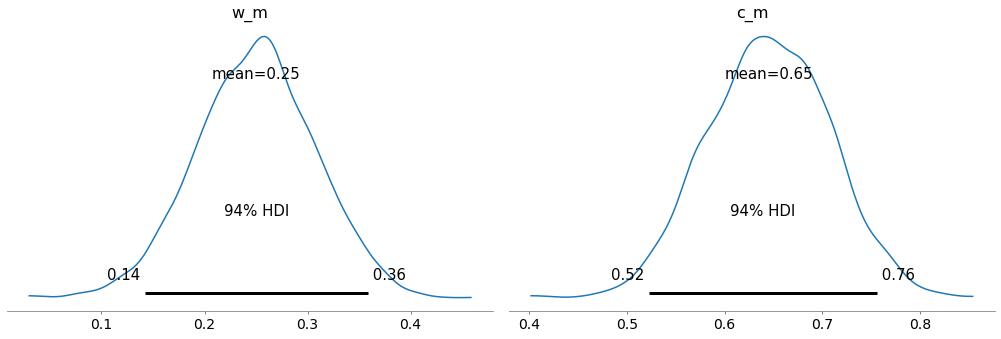

In [ ]:
az.plot_posterior(traces[1])



---


We see that for the first model, the most credible value of the model parameters are: 0.25 and 0.65 for $w_m$ and $c_m$ repectively.

We take a look at the traceplot, and notice that the chains are thoroughly mixed.

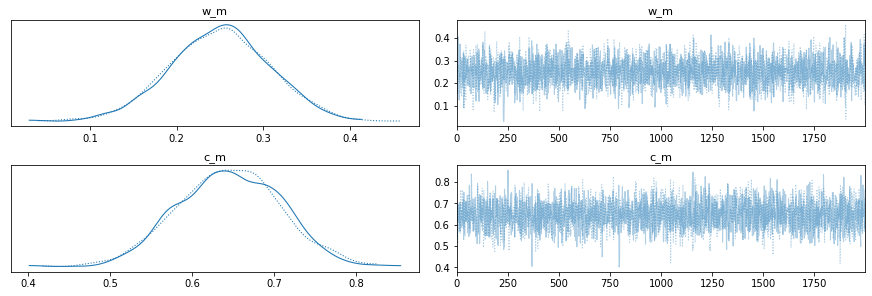

In [ ]:
with models[1]:
  pm.plot_trace(traces[1])

Now we want to ascertain which model is better for our system. For that we will focus on the Bayes Factor. Since we have assumed same prior distribution for the model parameters of both the models, The Bayes' Factor (BF) should give us suffient evidence on the nature of Posterior odds averaged over the parameters for the two models.<br>
The Bayes' Factor is given by:
$$BF=\frac{p(data\ |\ model\ 1)}{p(data\ |\ model\ 0)}$$
Which in essense is the ratio of two likelihood functions of the models.<br>
Here I have first considered the difference of the log-likelihoods for the two models and thereby taken their exponent to give us the desired value of Bayes' Factor

In [ ]:
BF = np.exp(traces[1].model_logp - traces[0].model_logp).sum()
BF

548317022710310.06

Clearly we see that $BF>3$. Hence for our system, data and assumptions, we have evidence to believe that for given setup, model 1 is more credible.<br>
In other words, <u>participants have a higher tendency of classifying the initial stimuli into Group A, and the tendency tend to decrease with each subsequent stimuli</u>.



---
## (d)
We chose the bias parameter $b = 0.5$ assuming no bias between the two categories.<br>
We will now make $b$ a free parameter, assuming a $Uniform(0,1)$ prior (as $0\leq b\leq 1$), and check if our assumption is valid.


In [ ]:
with pm.Model() as model100:
  w=pm.Uniform('w',0,1)                             
  c=pm.Exponential('c',1/30) 
  b=pm.Uniform('b',0,1)                         # Prior for b
  d_ij_A=(w*d1[grp_a[0]])+((1-w)*d2[grp_a[0]])      
  d_ij_B=(w*d1[grp_b[0]])+((1-w)*d2[grp_b[0]])      
  s_ij_A=np.exp(-c*d_ij_A)                          
  s_ij_B=np.exp(-c*d_ij_B)                          
  s_iA=s_ij_A.sum(axis=1)                           
  s_iB=s_ij_B.sum(axis=1)
  r=(b*s_iA)/((b*s_iA)+((1-b)*s_iB))            # r is redefined as originally stated in the question                    
  y_i=pm.Binomial('y_i',n=320,p=r[nstim_idx],observed=y[nstim_idx])  
  t_100=pm.sample(2000,tune=1500)                    

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, c, w]


Sampling 2 chains for 1_500 tune and 2_000 draw iterations (3_000 + 4_000 draws total) took 7 seconds.




---
We obtain the posterior plots for each parameter.<br>
We note that the most credible value of $b$ turns out to be 0.49. The 95% HDI interval is (0.46, 0.51) which includes the value 0.5.<br>
Thus we can say that it was indeed appropriate for us to fix the value of $b$ at 0.5.


/usr/local/lib/python3.7/dist-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43b99456d0>,
      dtype=object)

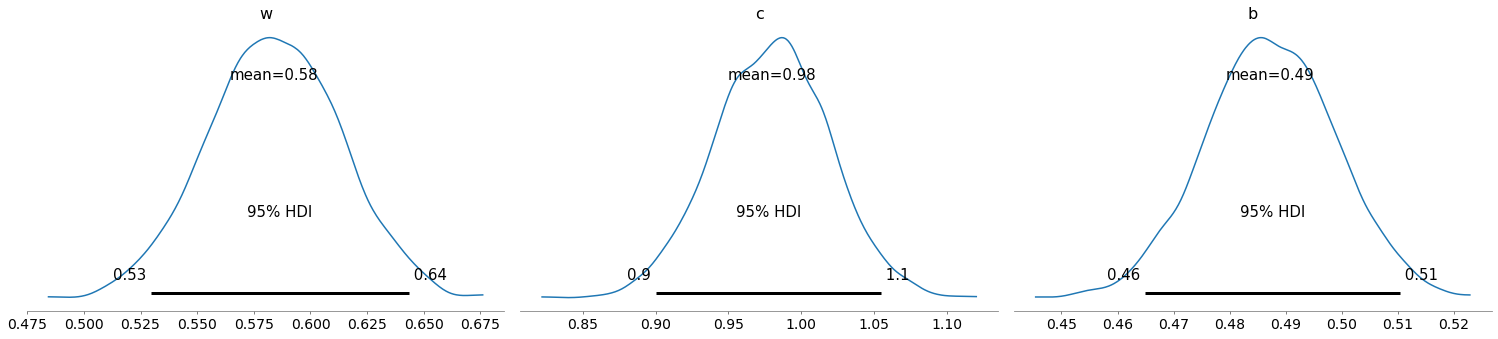

In [ ]:
az.plot_posterior(t_100,credible_interval=0.95)

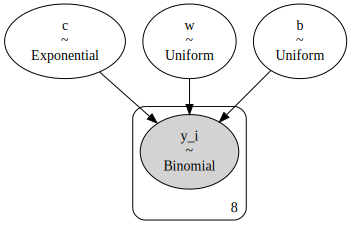

In [ ]:
pm.model_to_graphviz(model100)



---



---



---



## (e)
We will first perform a post-predictive check to conclude if points sampled out from our obtained posterior distribution fits the observed responses well enough.



---

Following is a Post Predictive Check of our Bayesian Model, which I have demonstrated using visual aids.<br>
We can clearly see that the Simulated points from the posterior distribution do not nearly match the observed $y$ values.<br>
This might indicate that the model we are assuming might not be a good one.

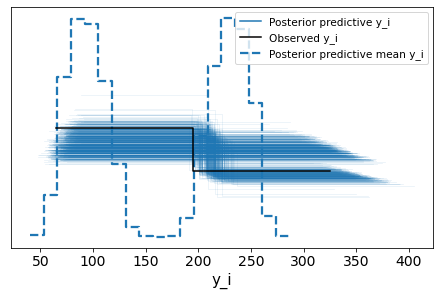

In [ ]:
with model0:
  y_pred = pm.sample_posterior_predictive(t_1, random_seed=10)
#data = az.from_pymc3(model=model0, trace=t_1, posterior_predictive=y_pred)
az.plot_ppc(az.from_pymc3(posterior_predictive=y_pred,model=model0),alpha=0.1,num_pp_samples=1000,kind='kde')



---
Now we will try to fit another model to the given data.<br>
We will use our categorization of participant responses into two groups which we had used in part <b>(c)</b>.<br>
<br>
We will assume that the participant categorization of the stimuli into group A to be normally distributed with mean $\mu$ and standard deviation $\sigma$.<br>
Now since the categorization itself follows a Binomial principle, we will reparameterize $\mu$ and $\sigma$ in terms of the probability of classifying a stimuli into group A by participants, say, $p$.<br>
We note that we had divided the participants into 2 groups each of size 20 based on nature of their reponses. Hence a block of 8 stimuli are also divided into 2 groups each of 8 stimuli.<br>
Since $0\leq p\leq p$, we will assume a Beta prior with parameters $\alpha$ and $\beta$.<br>
We will reparametrize $\alpha$ and $\beta$ further by introduced hyper-parameters $\omega$ and $\kappa$ which are the mode and confidence elements of our distribution.<br>
I have considered a Beta(1,1) (uninformed) prior for $\omega$ and Gamma(1,1/30) prior for $\kappa$.<br><br>
Thus, we get the following relations.
$$\omega\sim Beta(1,1)$$
$$\kappa\sim Gamma(1,1/30)$$
$$\alpha=\omega\cdot (\kappa-2)+1$$
$$\beta=(1-\omega)\cdot (\kappa-2)+1$$
consequently, $p\sim Beta(\alpha,\beta)$ <br>
Finally,
$$\mu=np=160\times p$$
$$\sigma=\sqrt{np(1-p)}=\sqrt{160p(1-p)}$$
Thus the likelihood distribution is:
$$y_{i|j}\sim Normal(\mu_j,\sigma_j),j=1,2,\ i=1(1)8$$




---
The dependency diagram is given as follows:


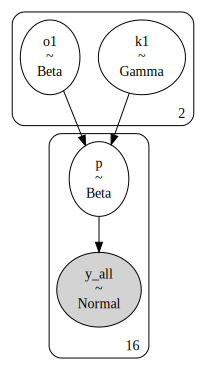

In [ ]:
pm.model_to_graphviz(m_l)

In [ ]:
g_id=np.repeat([0,1],[8,8])                            # Setting indexes for the two groups
with pm.Model() as m_l:
  o1=pm.Beta('o1',alpha=2,beta=1,shape=1)              # Interested in two sets of prior for mode for two groups
  k1=pm.Gamma('k1',1,1/30,shape=2)                     # Same logic for prior of k for two groups
  p=pm.Beta('p',alpha=o1[g_id]*(k1[g_id]-2)+1,beta=(1-o1[g_id])*(k1[g_id]-2)+1,shape=16)  # Since we have total 16 stimuli in two groups (8 each)
  y_all=pm.Normal('y_all',mu=160*p,sigma=(160*p*(1-p))**0.5,observed=x_all)        # Likelihood
  t_all=pm.sample(2000,tune=1500,target_accept=0.99)

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p, k1, o1]


Sampling 2 chains for 1_500 tune and 2_000 draw iterations (3_000 + 4_000 draws total) took 36 seconds.


We look at the traceplot and see that for the two groups, we get two different chains which are well mixed. We also see 16 chains for $p$ which is indeed expected as there are total 16 stimuli in 2 groups, and we are modelling our likelihood for each of those.

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:316: UserWarning: Could not compute log_likelihood, it will be omitted. Check your model object or set log_likelihood=False
  warnings.warn(warn_msg)


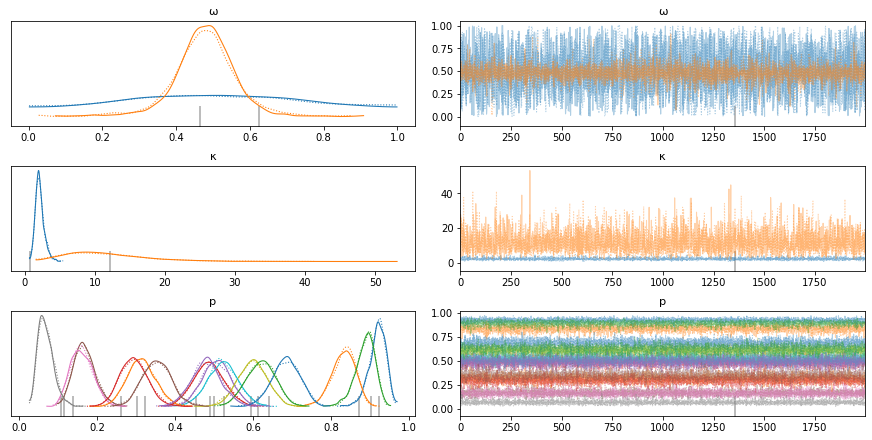

In [ ]:
with m_l:
  pm.traceplot(t_all)

Finally we will look into Posterior Predictive Check, and conclude on the basis of how well the simulated data from the posterior distrbution is able to predict the observed responses. <br>
We can clearly see that the sampled data from the posterior distribution closely match the observed response data. This is largely better than our initial Binomial model which did not yield a good result.

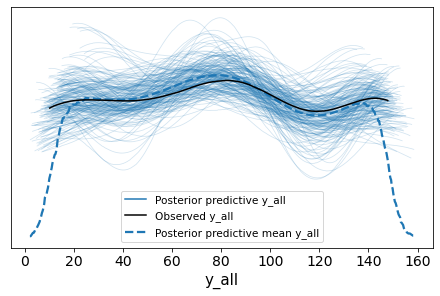

In [ ]:
with m_l:
  p=pm.sample_posterior_predictive(t_all)
az.plot_ppc(az.from_pymc3(posterior_predictive=p,model=m_l),num_pp_samples=200)

Thus on the basis of Post Predictive check by plotting simulated data from posterior against observed data, I thereby conclude that new Model is best among the two.